In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30,30)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

def show_image(image, description=''):
    plt.subplot()
    img = plt.imshow(image, interpolation='nearest')
    plt.axis('off')
    plt.title(description)
    plt.show()
    
def show_images(images, descriptions=[], layouts=''):
    if layouts == '':
        layouts = "{}1".format(len(images))
    if descriptions == []:
        descriptions = ['' for _ in range(len(images))]
    for i,img in enumerate(images):
        plt.subplot("{}{}".format(layouts, i+1))
        
        # 1 channel -> 3 channel
        if len(img.shape) == 2 or img.shape[2] == 1:
            img = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

        img = plt.imshow(img, interpolation='nearest')
        plt.axis('off')
        plt.title(descriptions[i])
    plt.show()

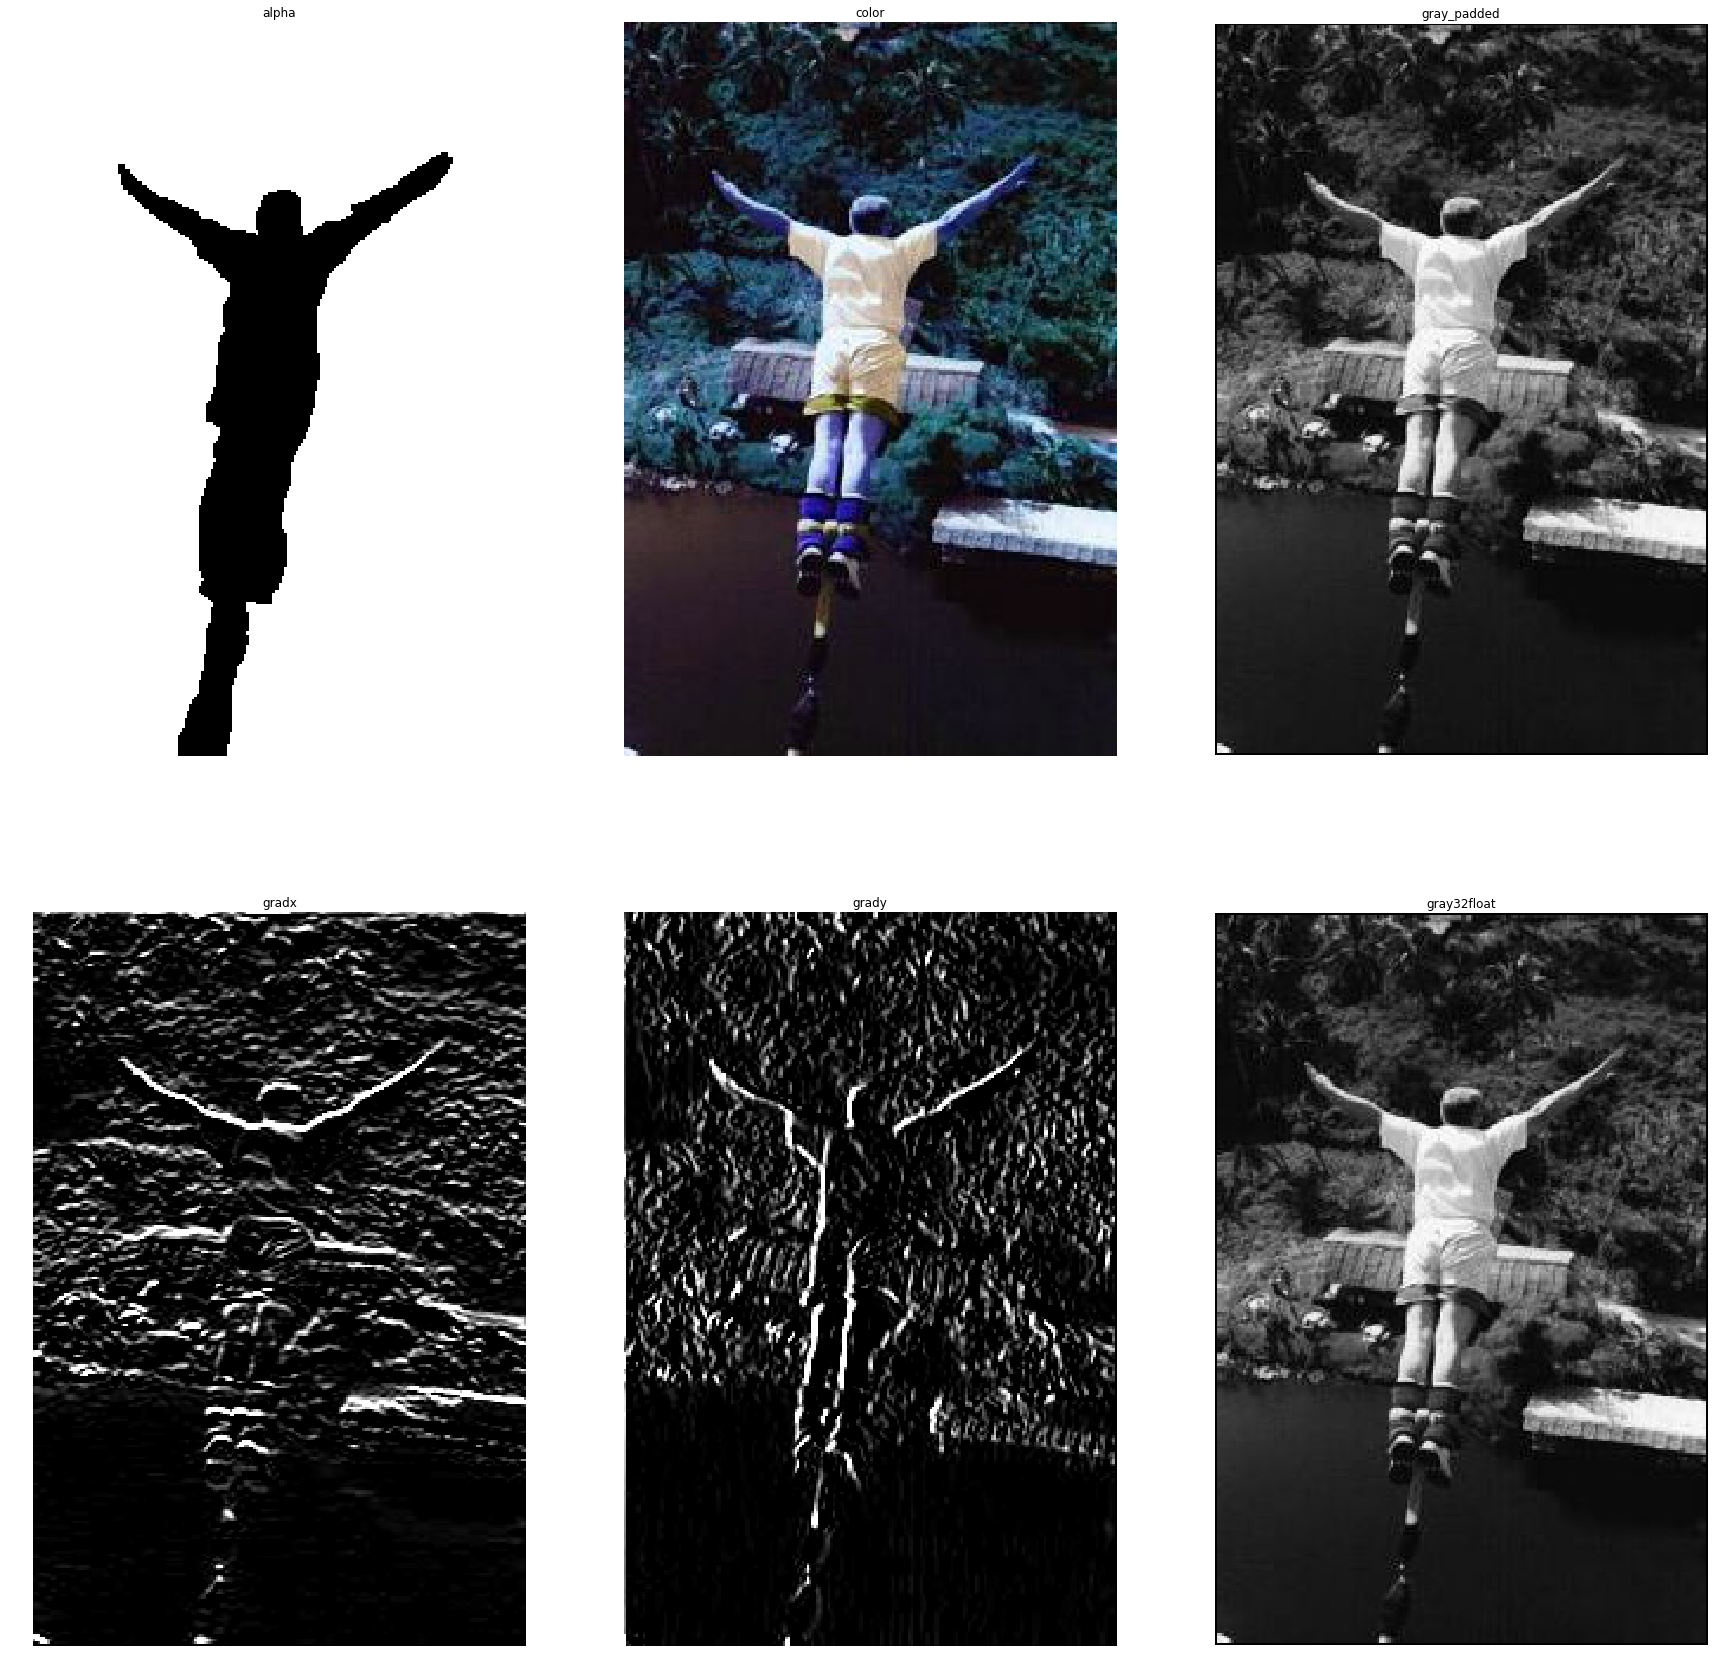

In [61]:
alpha = cv.imread("test_images/input-alpha.bmp")
color = cv.imread("test_images/input-color.jpg")
gray = cv.cvtColor(color, cv.COLOR_BGR2GRAY)          # 1 channel
gray_padded = cv.copyMakeBorder(gray,1,1,1,1,cv.BORDER_CONSTANT,value=0)

sobelx_kernel = np.array(([-1, -2, -1], [0, 0, 0], [1, 2, 1]))
sobely_kernel = sobelx_kernel.T
gradx = cv.filter2D(gray_padded,-1,sobelx_kernel)
grady = cv.filter2D(gray_padded,-1,sobely_kernel)

gradx = gradx[1:-1,1:-1]
grady = grady[1:-1,1:-1]

test = np.zeros((gray_padded.shape[0], gray_padded.shape[1], 3))
test[:,:,0] = gray_padded/255.
test[:,:,1] = gray_padded/255.
test[:,:,2] = gray_padded/255.


images = [alpha,color,gray_padded,gradx,grady,test]
descriptions = ['alpha','color','gray_padded','gradx','grady', 'gray32float']
show_images(images,descriptions,'23')

In [37]:
A = np.array([[1,1,1],[0,0,0],[0,0,0]], dtype=np.uint8)
B = np.array([ [255,255,0],[0,0,0],[0,0,0] ], dtype=np.uint8)
C = np.array([ [True,False,False],[False,False,False],[False,False,False] ])

np.logical_and(np.logical_and(A,B), C)

array([[ True, False, False],
       [False, False, False],
       [False, False, False]])

In [48]:
l = np.arange(10).reshape((2,5))
l = np.hstack((l,np.eye(2)))


np.unravel_index(np.argmax(l),l.shape)

[[0. 1. 2. 3. 4. 1. 0.]
 [5. 6. 7. 8. 9. 0. 1.]]


(1, 4)